X = Training set

x = instance feature (first element always one)

theta = model parameter and bais term

h_theta = linear regression hypothesis

In [1]:
import numpy as np

# To make this code example reproducible
np.random.seed(42)

m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.rand(m, 1)

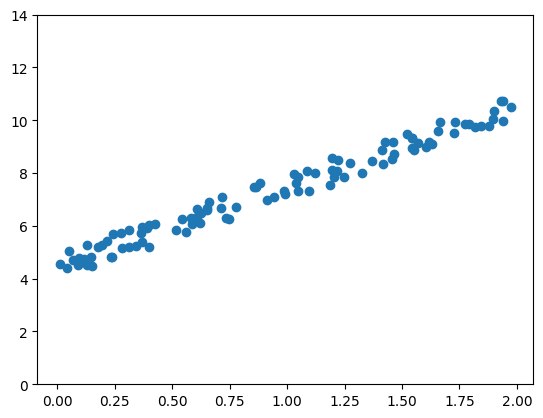

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.ylim([0, 14])
plt.show()

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # because for each instance I need one in the start
# np.linalg = algebra module
# @ is the matrix multiplication = np.matmul(A, B)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.51359766],
       [2.98323418]])

In [4]:
# We will use theta = 3, and theta_0 = 4 refer to 203

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best

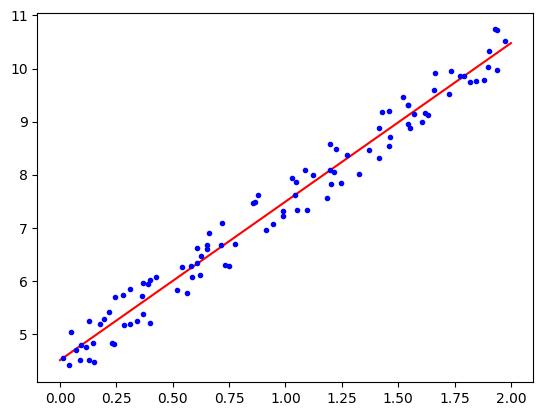

In [5]:
plt.plot(X_new, y_predict, 'r-', label = "Prediction")
plt.plot(X, y, 'b.')
plt.show()

In [6]:
# Now performing the same analysis on scikit learn

from sklearn.linear_model import LinearRegression
# LinearRegression use OLS - Ordinary least sqaures (Closed form solution)
# i.e. Normal Equation
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print (lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.51359766] [[2.98323418]]


array([[ 4.51359766],
       [10.48006601]])

In [7]:
# LinearRegression is based on scipy.linalg.lstsq() method
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y,
                                                     rcond = 1e-6)
theta_best_svd
# The above method computes the pesudoinverse_of_X @ y

array([[4.51359766],
       [2.98323418]])

In [8]:
# The same above can be done by following
np.linalg.pinv(X_b) @ y

array([[4.51359766],
       [2.98323418]])

In [9]:
# WHAT IS PESUDOINVERSE? Search!
# WHAT IS SVD decomposition?
a,b,c = np.linalg.svd(X_b)

In [10]:
a

array([[-8.51341424e-02,  6.16132489e-02, -8.96233597e-02, ...,
        -1.01302130e-01, -1.16727468e-01, -1.13563842e-01],
       [-1.45246051e-01, -1.23527170e-01, -9.95358962e-02, ...,
         2.25873105e-03,  1.36709232e-01,  1.09134404e-01],
       [-1.22427086e-01, -5.32463752e-02,  9.84685201e-01, ...,
        -8.30989388e-03,  9.42195632e-04, -9.55341209e-04],
       ...,
       [-9.06636945e-02,  4.45826201e-02, -7.24818749e-03, ...,
         9.90677854e-01, -1.20614338e-02, -1.14996256e-02],
       [-4.87105580e-02,  1.73795308e-01,  3.40620546e-03, ...,
        -1.06591304e-02,  9.70763352e-01, -2.54265328e-02],
       [-5.73148437e-02,  1.47294718e-01,  1.22106630e-03, ...,
        -1.03849245e-02, -2.57141351e-02,  9.77429775e-01]])

In [11]:
b

array([14.37020392,  4.11961067])

In [12]:
c

array([[-0.66187141, -0.74961739],
       [ 0.74961739, -0.66187141]])

In [13]:
# Every instance has ith set of features

# Gradient Descent

In [14]:
eta = 0.1
n_epochs = 1000
m =len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)
for epochs in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients

In [15]:
theta

array([[4.51359766],
       [2.98323418]])

#Stochastic Gradient Descent

In [16]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi =X_b[random_index : random_index + 1]
    yi =y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi)

    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients
print(gradients)
theta

[[0.52187775]
 [0.6274171 ]]


array([[4.51519945],
       [2.97776947]])

In [18]:
m

100

The code you provided implements a stochastic gradient descent (SGD) optimization algorithm for linear regression. The goal is to find the optimal parameters (theta) that minimize the cost function for a given dataset (X_b, y).

Here's a breakdown of the code:

1. `n_epochs = 50`: The number of epochs is the number of times the entire dataset is traversed during training.

2. `t0`, `t1 = 5, 50`: Parameters used for the learning schedule. The learning schedule defines the learning rate (eta) for each iteration during training. The learning rate decreases as the number of iterations increases, which helps the algorithm to converge to a better solution.

3. `def learning_schedule(t)`: This function calculates the learning rate (eta) for each iteration based on the current iteration index (t), using the formula `t0 / (t + t1)`.

4. `np.random.seed(42)`: Sets a random seed to ensure reproducibility of results.

5. `theta = np.random.rand(2, 1)`: Initializes the parameters (theta) for the linear regression model with random values.

6. The main training loop:

   - `for epoch in range(n_epochs)`: This loop iterates over the specified number of epochs.

   - `for iteration in range(m)`: This loop iterates over each data point in the dataset.

   - `random_index = np.random.randint(m)`: Randomly selects an index from the dataset.

   - `xi = X_b[random_index : random_index + 1]` and `yi = y[random_index : random_index + 1]`: Retrieves a single data point and its corresponding target value from the dataset.

   - `gradients = 2 * xi.T @ (xi @ theta - yi)`: Calculates the gradients of the cost function with respect to the parameters (theta) for the current data point using the current model parameters.

   - `eta = learning_schedule(epoch * m + iteration)`: Calculates the learning rate (eta) for the current iteration using the learning schedule function.

   - `theta = theta - eta * gradients`: Updates the parameters (theta) using the stochastic gradient descent update rule to move them towards the optimal values that minimize the cost function.

The stochastic gradient descent algorithm iterates through the dataset one data point at a time, updating the parameters based on the gradients for each data point. This approach makes it computationally efficient, especially for large datasets, and allows the algorithm to converge to a good solution.

By the end of the training process (after 50 epochs in this case), `theta` will contain the optimized parameters for the linear regression model, which can be used for making predictions on new data points.

You are correct that stochastic gradient descent (SGD) runs for more iterations compared to batch gradient descent. However, the advantage of SGD lies in its efficiency and ability to update the model parameters more frequently, leading to potentially faster convergence and better generalization on large datasets. Here are some reasons why SGD can be advantageous over batch gradient descent:

1. Efficiency:
In batch gradient descent, the entire dataset is used to compute the gradients and update the model parameters after every epoch. This can be computationally expensive, especially for large datasets, as it requires a lot of memory to hold the entire dataset in memory during each iteration. On the other hand, SGD only uses a single data point (or a small batch of data points) to compute the gradients and update the parameters in each iteration, which requires much less memory and can be more computationally efficient.

2. More Frequent Parameter Updates:
SGD updates the model parameters more frequently because it processes each data point individually. This can lead to faster convergence towards the optimal solution, especially when the loss landscape is complex and contains many local optima. The frequent updates help the algorithm escape from local optima and explore different regions of the parameter space.

3. Better Generalization:
SGD's frequent updates can prevent overfitting and improve generalization performance. By updating the parameters with smaller steps in each iteration, the algorithm can avoid overshooting the optimal solution and make smaller adjustments to the model, leading to better generalization on unseen data.

4. Exploration-Exploitation Tradeoff:
SGD allows for a good balance between exploration and exploitation. By randomly selecting data points for each iteration, the algorithm can explore different parts of the dataset and make updates that are representative of the entire dataset, rather than just relying on one batch of data like in batch gradient descent.

However, it's essential to note that SGD can be more noisy than batch gradient descent due to the frequent updates with individual data points. As a result, the loss function may fluctuate more during training, and the convergence might be less smooth. To mitigate this, mini-batch gradient descent is often used, where the algorithm processes a small batch of data points (typically 32, 64, or 128) in each iteration, striking a balance between the benefits of SGD and the stability of batch gradient descent.

In summary, while SGD requires more iterations, it can offer advantages in terms of efficiency, faster convergence, better generalization, and exploration-exploitation tradeoff, making it a popular choice for training machine learning models, especially in deep learning. However, the choice between SGD and batch gradient descent ultimately depends on the specific problem, the dataset size, and the available computational resources.

In [25]:
from sklearn.linear_model import SGDRegressor
# Pentalty = None ==> Not using Regularization
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None,
                       eta0 = 0.01, n_iter_no_change = 100,
                       random_state =42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because SGDRegressor expect 1D target

sgd_reg.intercept_, sgd_reg.coef_


(array([4.50316965]), array([2.99156535]))